# Exploratory data analysis

Welcome to the fifth week of the course. By the end of this week, you should acquire:

**Knowledge on:**
* Exploratory data analysis methods
* Choosing appropriate visualisations

**Skills on:**
* Conducting exploratory data analysis
* Visualising different types of data

In today's class we will use some packages that your are already familiar with and some new ones that you need to install.

In [ ]:
#install matplotlib seaborn scipy 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

## Data exploration

### General objectives

We will work with a dataset on titles and descriptions of YouTube videos that mention Joe Biden (this data is collected using YouTube API, more on that next week). 

To guide our class, we will pose two research questions that we can answer with the data:
1. To what extent is the sentiment expressed in the title of the video related user engagement (views, likes and dislikes)?</br> *Tip: to create an overall sentiment score, I need at add the negative score to the positive score*
2. To what extent does the sentiment expressed in the title of the video vary depending on whether Joe Biden is mentioned in the video?
3. To what extent the category of the video is related to mentions of Joe Biden in the video?


### Step 1: loading data

In [2]:
import pandas as pd

In [3]:
df = pd.read_pickle('videos_biden.pkl')

In [4]:
print("Shape of my data =", df.shape)
print("Variables:", df.columns)  

Shape of my data = (356, 32)
Variables: Index(['channelId', 'channelTitle', 'videoId', 'publishedAt', 'publishedAtSQL',
       'videoTitle', 'videoDescription', 'tags', 'videoCategoryId',
       'videoCategoryLabel', 'duration', 'durationSec', 'dimension',
       'definition', 'caption', 'thumbnail_maxres', 'licensedContent',
       'viewCount', 'likeCount', 'dislikeCount', 'favoriteCount',
       'commentCount', 'dislikeCount_no_na', 'lang_title', 'negative',
       'positive', 'neutral', 'category', 'biden_tag', 'biden_title',
       'biden_description', 'biden_mentioned'],
      dtype='object')


Observation: To answer the RQs I need to look at variables related to sentiment (negative, posiitive), engagement metrics and mentions of Joe Biden. They seem all to be included in the dataset.

Observations: I am interested in commentCount that seems to have missing valuse. I need to take care of it.

Observation: from the variables I am interested in, all variables are nummerig except for sentiment, which is string.

### Step 2: Data cleaning and preparation

Based on loading and first exploration I know I need to:
1. Fix data types for sentiment and prepare sentiment score.
2. Deal with missing values in comment count.

count    356.000000
mean      -0.353933
std        0.861385
min       -4.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        2.000000
Name: sentiment, dtype: float64

count      326.000000
mean      1139.003067
std       4636.133969
min          0.000000
25%         24.000000
50%        142.000000
75%        635.500000
max      68194.000000
Name: commentCount, dtype: float64

(326, 33)

### Data exploration

In [ ]:
#Exploring continous data
df.describe().transpose()

Looking at frequencies for categorical data

Exploring relations between variables

In [ ]:
df.groupby('category')['sentiment'].agg([np.mean, np.std]).transpose()

In [ ]:
print("Mean sentiment depending on mention of biden and category")
df.groupby(['biden_mentioned', 'category'])['sentiment'].mean()

In [ ]:
print("Crosstab biden mentioned and video category")
print(pd.crosstab(df["biden_mentioned"], 
                  df["category"], normalize=True))

### Step 3: Data visualization

## Visualization

#### Introduction to matplotlib

The general idea with matplotlib is to create an empty figure, and then add elements (axes, labels, titles, ...) to it, and then either save or show the image.

This is especially useful if your data are not in a pandas dataframe, but, for instance, in some lists.

There are multiple ways of plotting things with matplotlib, but the most common one is probably to just plot lists of values:


Text(0.5, 0, 'x lable')

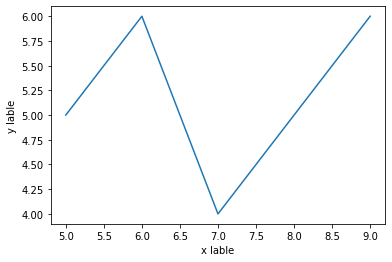

In [9]:
#line by line plotting

list1 = [5,6,7,8,9]
list2 = [5,6,4,5,6]
list3 = [7,5,7,3,5]


plt.plot(list1,list2)
plt.ylabel("y lable")
plt.xlabel("x lable")

However, you get more **control** and make your plot **scalable** if you use an object-oriented approach and create a figure and an axis object first:

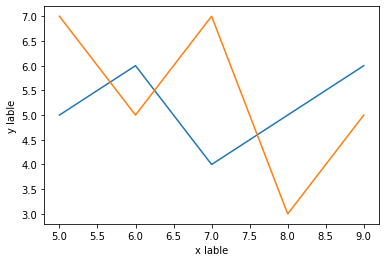

In [6]:
# filling an object

# Create a figure and a so-called axis within it
fig, ax = plt.subplots() # <---- different

ax.set_ylabel("y lable")
ax.set_xlabel("x lable")
ax.plot(list1,list2)
ax.plot(list1,list3)

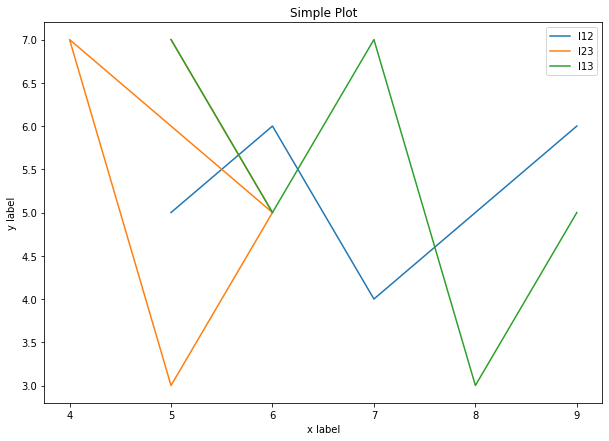

In [10]:
# Create a figure and a so-called axis within it
empty_fix, axes = plt.subplots(figsize=(10,7))

# let's generate some sample data
# plot some function
axes.plot(list1,list2, label='l12')
axes.plot(list2,list3, label='l23')
axes.plot(list1,list3, label='l13')

# add labels, titles, legends, ...
axes.set_xlabel('x label')
axes.set_ylabel('y label')
axes.set_title("Simple Plot")
axes.legend()

# Save and/or show the figure. Use ? to get different options for file formats etc
#fig.savefig('test.png',dpi=300)

#### Matplotlib x Pandas

The most useful way for you in this class to interact with matplotlib, however, is via pandas. Pandas dataframes have build-in methods that call matplotlib 'under the hood', which makes it very easy for you to use.

You essentially just add `.plot()` to a table-like object, and it will produce a plot. With the `kind` argument, you can specify which type of plot you want (pie, bar, line, etc)

The nice thing is that you still can use the native matplotlib functions presented above, for instance plt.savefig() if you want to save the figures.

<AxesSubplot:ylabel='Frequency'>

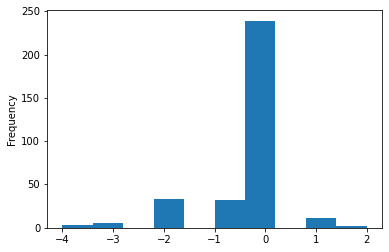

In [19]:
df['sentiment'].plot.hist()

<AxesSubplot:>

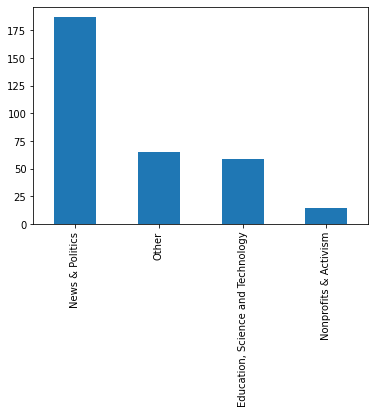

In [20]:
df['category'].value_counts().plot.bar()

<AxesSubplot:xlabel='publishedAt'>

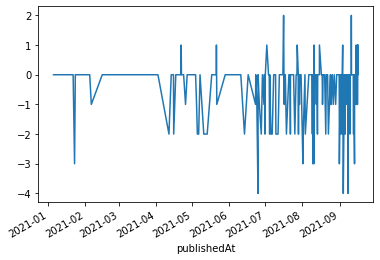

In [21]:
df.groupby(["publishedAt"])["sentiment"].mean().plot()

<AxesSubplot:xlabel='publishedAt'>

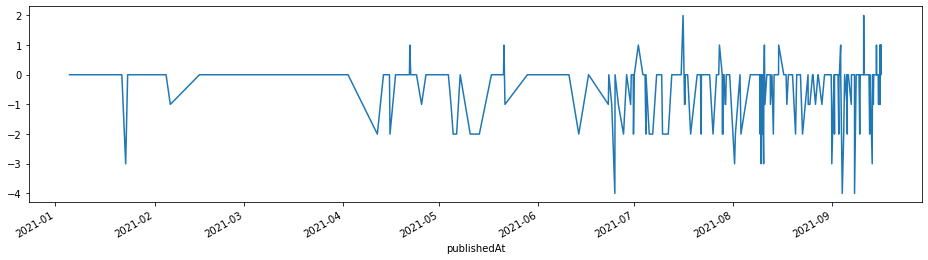

In [22]:
fig, ax = plt.subplots(figsize=(16,4))

df.groupby(["publishedAt"])["sentiment"].mean().plot(ax=ax)

#### Seaborn

Seaborn is built on matplotlib, but uses a different grammar. You may find it, in fact, more intuitive, as you basically provide each seaborn function with a couple of arguments (see slides).

When using seaborn, we do not use the method `.plot` of a pandas object (as with matplotlib), but call the seaborn function directly and pass on the dataframe with the `data = ...` argument

In [ ]:
df.columns

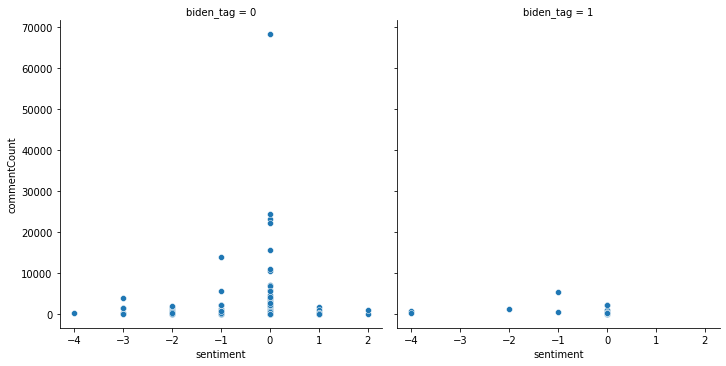

In [23]:
sns.relplot(x="sentiment", y="commentCount",  col='biden_tag', data=df)

### Basic chart types and how to make them

### Univariate visualisations

#### Bar charts

* counts per (discrete) category

In [ ]:
# with matplotlib
df['biden_tag'].value_counts(sort=False).plot(kind='bar')

In [ ]:
# with seaborn
sns.countplot(x = 'biden_tag', data=df)

#### Histagram

* distribution of a variable

In [ ]:
df['sentiment'].plot.hist()

In [ ]:
sns.histplot(data=df, x='sentiment')

In [ ]:
sns.histplot(data=df, x='viewCount')

In [ ]:
sns.histplot(data=df[(df["viewCount"] < 10000)], x='viewCount')

### Bivariate visualisations

#### Bar charts

*  statistical property (e..g, mean) per (discrete) category
* different variations (e.g., stacked bar charts)

In [ ]:
sns.barplot(x="biden_tag", y="sentiment", data=df, ci=95)

In [ ]:
sns.barplot(data=df, x='biden_tag', y = 'positive', estimator=np.median, ci=None)

In [ ]:
sns.barplot(x="biden_tag", y="sentiment",  hue="category",  data=df, ci=None)

#### Line plots

* ordered (and typically evenly spaced) values on x-axis
* x-axis has many (in theory: contious) measurements
* typical use case: plot some value(s) over time

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(x='publishedAt', y='viewCount', data=df)

In [ ]:
plt.figure(figsize = (15,8))
sns.lineplot(x='publishedAt', y='viewCount', hue='category', data=df)

#### Regplot/relplot

* For visualising relation between two continous variables 

In [ ]:
#using matplotlib
df.plot.scatter(x='sentiment', y='viewCount', c='yellow')

In [ ]:
#using seaborn
sns.relplot(x='sentiment', y='viewCount', data=df)

In [ ]:
#using seaborn
sns.regplot(x='sentiment', y='viewCount', data=df)

In [ ]:
sns.relplot(x="sentiment", y="viewCount", col="biden_mentioned",
            hue="category",
            data=df);

In [ ]:
# We could also add histograms to the sides
sns.jointplot(data = df, x = 'sentiment', y='likeCount', 
              kind="scatter", color="#4CB391")

In [ ]:
# ... or replace the scatterplot by a hexplot in which overlapping points lead to a darker shade
sns.jointplot(data = df, x = 'sentiment', y='likeCount', 
              kind="hex", color="#4CB391")

## Back to our RQ's

1. To what extent is the sentiment expressed in the title of the video related user engagement (views, likes and dislikes)?
2. To what extent does the sentiment expressed in the title of the video vary depending on whether Joe Biden is mentioned in the video?
3. To what extent the category of the video is related to mentions of Joe Biden in the video?

### RQ1
#### Univariate visualisations

#### Bivariate visualisations

### RQ2
#### Univariate visualisations

#### Bivariate visualisations

### RQ3
#### Univariate visualisations

#### Bivariate visualisations

## Statistics in Python

### Short intro to NumPy

In [ ]:
import numpy as np

In [ ]:
numbers = [6,7,4,6,7]
print(np.mean(numbers), ', ', np.std(numbers))

In [ ]:
x = [88,66,4,7]
y = [5,57,22,6]
np.corrcoef([x,y])

### Correlation (Pearson's r)

In [ ]:
df['sentiment'].corr(df['likeCount'])

In [ ]:
from scipy.stats import pearsonr

pearsonr(df['sentiment'], df['likeCount'])

### Independent sample t-tests

In [ ]:
import scipy.stats as stats


stats.ttest_ind(df['likeCount'][df['biden_mentioned'] == 0],
                df['likeCount'][df['biden_mentioned'] == 1])

### Bonus: assumption checking

In [ ]:
#Levene's test
stats.levene(df['likeCount'][df['biden_mentioned'] == 0],
             df['likeCount'][df['biden_mentioned'] == 1],
             center= 'mean')